In [53]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.environ['MLFLOW_ENABLE_SYSTEM_METRICS_LOGGING'] = 'true'


# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 30
pd.options.display.max_rows = 30
pal = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
sns.set_palette("bright")
sns.set(font_scale=1.3)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


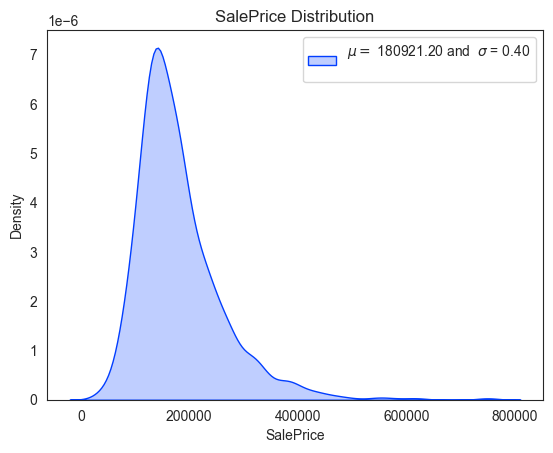

In [4]:
sns.set_style('white')
sns.kdeplot(data = train, x = train['SalePrice'], palette=pal, fill = True)
plt.xlabel('SalePrice')
plt.title('SalePrice Distribution')
plt.legend(['$\mu = $ {:.2f} and  $\sigma$ = {:.2f}\n'.format(train['SalePrice'].mean(),np.log1p(train['SalePrice']).std())], loc = 'best')
plt.show()


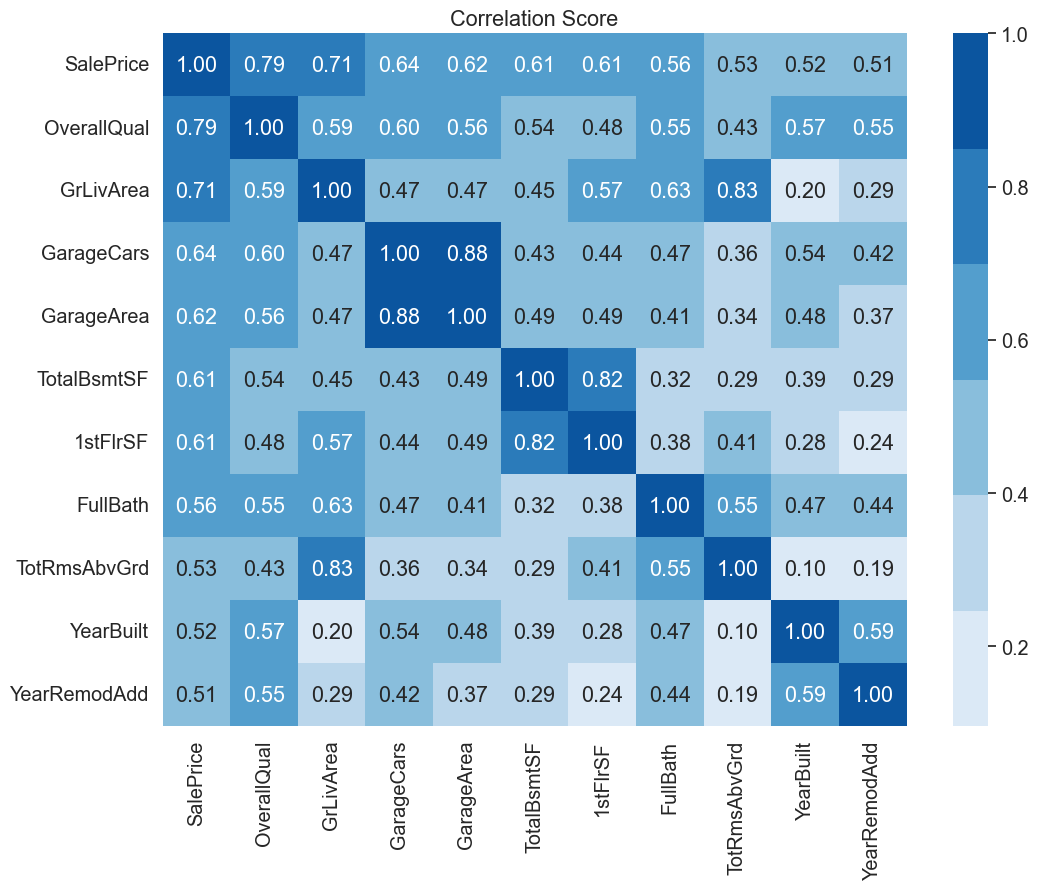

In [86]:
all_data_num = train.select_dtypes(include = np.number)
k = 11
cols = all_data_num.corr().nlargest(k, 'SalePrice')['SalePrice'].index
plt.figure(figsize = (12,9))
cm = np.corrcoef(all_data_num[cols].values.T)
sns.set(font_scale = 1.3)
sns.heatmap(cm, cbar = True, xticklabels=cols.values, yticklabels=cols.values, fmt = '.2f', annot = True, cmap = sns.color_palette('Blues'))
plt.title('Correlation Score')
plt.savefig('fig/highest_corr_features', dpi = 300, bbox_inches = 'tight')


### Feature Engineering

In this step, we will clean:

1. Missing Data

2. Outlier

3. Skewed Features

In [12]:
# Handle Missing Value
all_data = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'], 
                      test.loc[:,'MSSubClass':'SaleCondition']])
total = all_data.isnull().sum().sort_values(ascending = False)
percent =(all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
new_data = pd.concat([total, percent], axis =1, keys = ['Total', 'Percent'])
new_data

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
...,...,...
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000
GrLivArea,0,0.000000


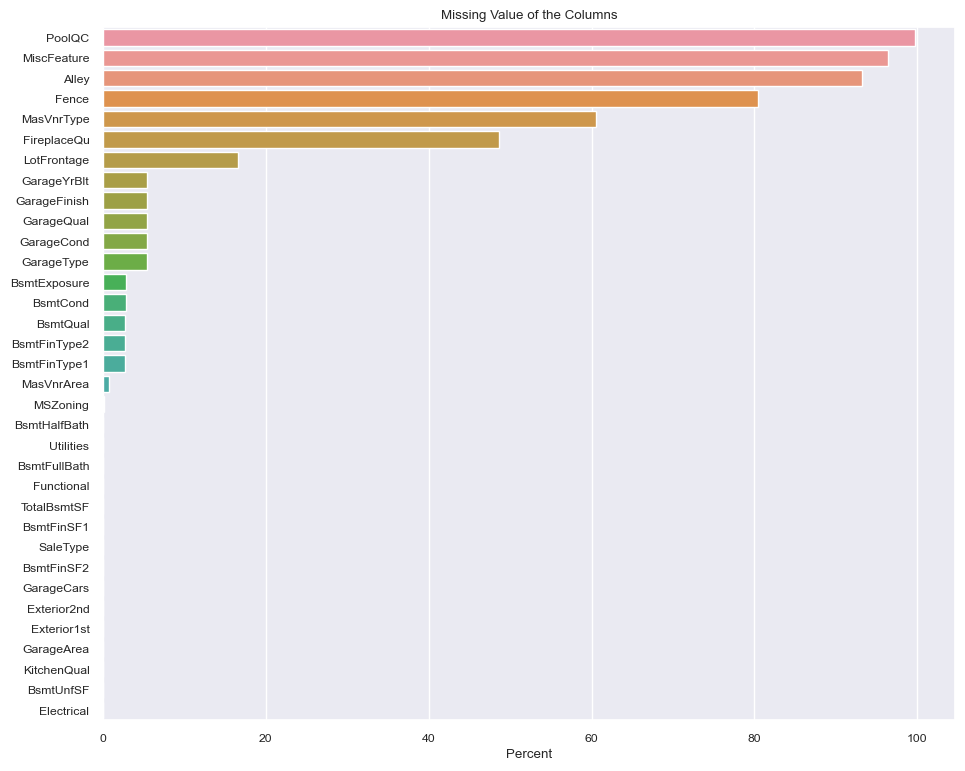

In [16]:
plt.figure(figsize=(11,9))
miss_data = new_data.drop(new_data[new_data['Percent'] == 0].index)
sns.barplot(data = miss_data, y = miss_data.index, x = miss_data.Percent)
plt.title('Missing Value of the Columns')
plt.tight_layout
plt.savefig('fig/null_barplot', dpi = 200)
plt.show()

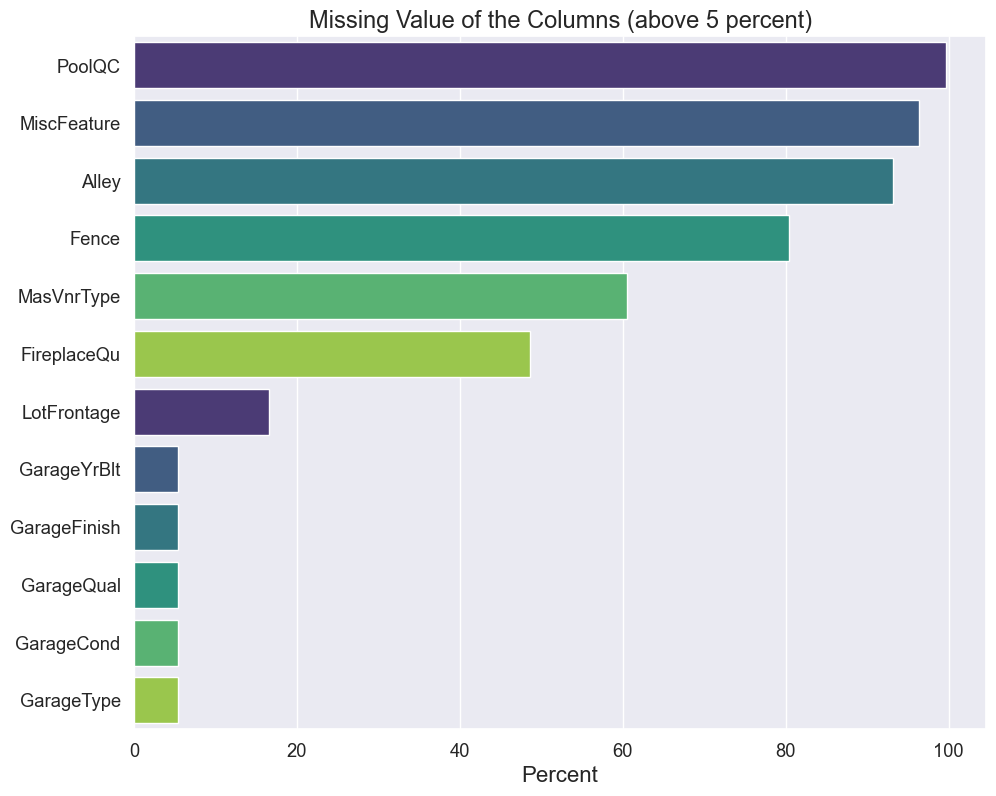

In [57]:
plt.figure(figsize=(11,9))
sns.set(font_scale = 1.2)
miss_data = new_data.drop(new_data[new_data['Percent'] == 0].index)
sns.barplot(data = miss_data, y = miss_data[miss_data.Percent > 5].index, x = miss_data[miss_data.Percent> 5]['Percent'], palette= sns.color_palette('viridis'))
plt.title('Missing Value of the Columns (above 5 percent)', size = 17)
plt.xlabel('Percent', size = 16)
plt.tight_layout
plt.savefig('fig/null value above five')
plt.show()

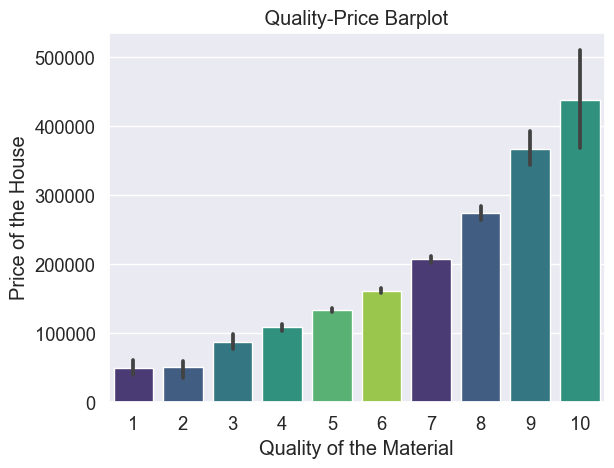

In [88]:
# Correlation between OverallQUal and SalePrice
sns.set(font_scale = 1.2)
sns.barplot(data = train, x = train['OverallQual'], y = train['SalePrice'], palette = sns.color_palette('viridis'))
plt.xlabel('Quality of the Material')
plt.ylabel('Price of the House')
plt.title(" Quality-Price Barplot ")
plt.tight_layout
plt.savefig('fig/quality price barplot', dpi = 300, bbox_inches = 'tight')
plt.show()

In [10]:
# Drop null data below 5 percent
clean_data = all_data.drop((new_data[new_data['Percent']>5]).index, axis = 1)
clean_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object', length=67)

### Handle BsmtX Columns

- BsmtQual: Evaluates the height of the basement
---
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

---

- BsmtCond: Evaluates the general condition of the basement
---
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

---
	
- BsmtExposure: Refers to walkout or garden level walls
---
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

---

- BsmtFinType1: Rating of basement finished area
---
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

---

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Rating of basement finished area (if multiple types)
---
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

---

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

Text(0.5, 1.0, 'Null value of BsmtX columns')

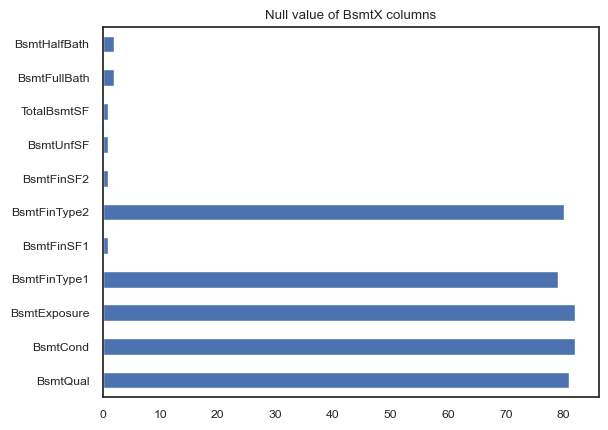

In [12]:
#Filter BsmtX Features
sns.set_style('white')
bsmt = clean_data.filter(regex='(b|B)smt')
(bsmt.isnull().sum()).plot(kind = 'barh')
plt.title('Null value of BsmtX columns')

In [13]:
# Seperate numeric and categorical (string) datatype
num_bsmt = bsmt.select_dtypes(include = [np.number])
cat_bsmt = bsmt.select_dtypes(exclude = [np.number])
str_bsmt = bsmt.select_dtypes(include = 'object')
bsmt_cont = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_disc = ['BsmtFullBath', 'BsmtHalfBath']

In [14]:
# sum of zero values in BsmtX columns
num_bsmt[num_bsmt[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']]==0][['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].value_counts()

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF
0.0         0.0         0.0          78
Name: count, dtype: int64

Text(0.5, 1.0, 'Basement Size Distribution (in Square Feet)')

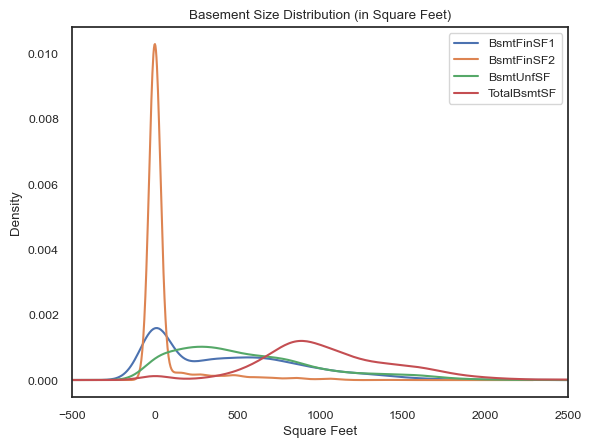

In [15]:
# If the value of BsmtX is zero, it means that there is no basement is the house
# Data Distributions of BsmtX features
num_bsmt[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].plot(kind = 'kde')
plt.xlim(-500, 2500)
plt.xlabel('Square Feet')
plt.title('Basement Size Distribution (in Square Feet)')

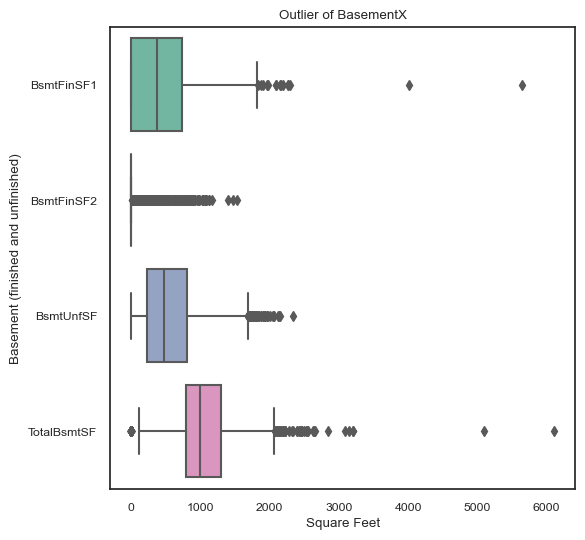

In [16]:
#Checking Outliers
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.boxplot(data = num_bsmt[bsmt_cont], orient='h', palette='Set2')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Basement (finished and unfinished)')
ax.set_title("Outlier of BasementX")
fig.tight_layout
plt.show()

In [17]:
# BsmtX Categorical, String Data
# Handle Missing Value. Changing from np.Nan to NA, according to the data description
all_data[str_bsmt.columns] = all_data[str_bsmt.columns].fillna('NA')

In [18]:
# Lets fill in the null value in Numeric basement
all_data['BsmtHalfBath'].fillna(0, inplace = True)
all_data['BsmtFullBath'].fillna(0, inplace = True)

In [19]:
# Show the null value positions
bsmtsf= num_bsmt.drop(['BsmtFullBath','BsmtHalfBath'], axis = 1)
null_position = bsmtsf[bsmtsf.isnull().any(axis = 1)]
print(null_position)

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
660         NaN         NaN        NaN          NaN


In [20]:
# Fill in the missing data of numeric BsmtX columns
# Consider the basement is unfinished
all_data['BsmtFinSF1'].fillna(0, inplace = True)
all_data['BsmtFinSF2'].fillna(0, inplace = True)
all_data['BsmtUnfSF'].fillna(all_data['TotalBsmtSF'].median(), inplace = True)
all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].median(), inplace = True)

In [21]:
# Let's check the BsmtX columns for the last time
all_data[num_bsmt.columns].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

---

---

### Handle GarageX Features

Text(0.5, 1.0, 'Null Value of GarageX features')

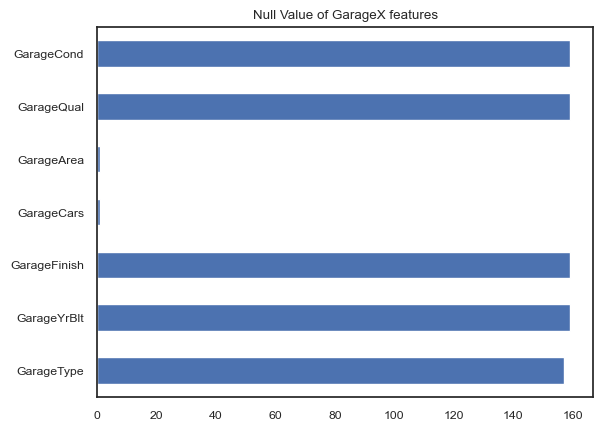

In [25]:
#Garage features 
garage = all_data.filter(regex = "(G|g)arage")
(garage.isnull().sum()).plot(kind = 'barh')
plt.title('Null Value of GarageX features')

- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

In [27]:
# Split Object and Numeric value of GarageX columns
str_grg = garage.select_dtypes(include = 'object')
num_grg = garage.select_dtypes(exclude='object')
str_grg

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,RFn,TA,TA
1,Attchd,RFn,TA,TA
2,Attchd,RFn,TA,TA
3,Detchd,Unf,TA,TA
4,Attchd,RFn,TA,TA
...,...,...,...,...
1454,NaN,NaN,NaN,NaN
1455,CarPort,Unf,TA,TA
1456,Detchd,Unf,TA,TA
1457,NaN,NaN,NaN,NaN


In [28]:
# Fill Null Value in str_garage dataset with NA.
all_data[str_grg.columns] = all_data[str_grg.columns].fillna('NA')
all_data[str_grg.columns].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [29]:
# Check the anomalie between GarageCars and Garage Area columns
num_grg[num_grg['GarageCars']==0.0][['GarageCars','GarageArea']]

,GarageCars,GarageArea
39,0.0,0.0
48,0.0,0.0
78,0.0,0.0
88,0.0,0.0
89,0.0,0.0
...,...,...
1433,0.0,0.0
1449,0.0,0.0
1453,0.0,0.0
1454,0.0,0.0


In [30]:
# No Anomalies. Let's fill the null value in
all_data['GarageCars'].fillna(0, inplace = True)
all_data['GarageArea'].fillna(0, inplace = True)
all_data[num_grg.columns].isnull().sum()

GarageYrBlt    159
GarageCars       0
GarageArea       0
dtype: int64

<Axes: >

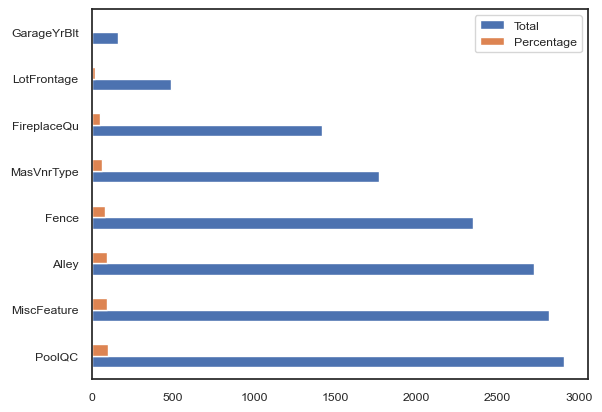

In [31]:
#Lets check the null value in the data
total_na = all_data.isnull().sum().sort_values(ascending =False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
new_null_data = pd.concat([total_na, percent], axis = 1, keys = ['Total', 'Percentage'])
new_null_data[new_null_data['Percentage']>5].plot(kind = 'barh')
plt.title('Count of Null Value for Numeric Data')

The `GarageX` Features (Unless GarageYrBlt) with null values had been handled. Now, let's check another features with less variant values.

In [33]:
# The PoolQC feature (null data)
pool_data = all_data.filter(regex = '(p|P)ool')
print(all_data.groupby('PoolQC')['PoolQC'].value_counts())
print('Total Null Data: ', all_data['PoolQC'].isnull().sum())

PoolQC
Ex    4
Fa    2
Gd    4
Name: count, dtype: int64
Total Null Data:  2909


In [34]:
# fill null data of PoolQC
all_data['PoolQC'] = all_data['PoolQC'].fillna('NA')

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [36]:
# The MiscFeature feature (null data)
print(all_data.groupby('MiscFeature')['MiscFeature'].value_counts())
print('Total Null Data: ', all_data['MiscFeature'].isnull().sum())

MiscFeature
Gar2     5
Othr     4
Shed    95
TenC     1
Name: count, dtype: int64
Total Null Data:  2814


MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [38]:
# The Alley feature (null data)
print(all_data.groupby('Alley')['Alley'].value_counts())
print('Total Null Data: ', all_data['Alley'].isnull().sum())

Alley
Grvl    120
Pave     78
Name: count, dtype: int64
Total Null Data:  2721


Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [40]:
# The Fence feature (null data)
print(all_data.groupby('Fence')['Fence'].value_counts())
print('Total Null Data: ', all_data['Fence'].isnull().sum())

Fence
GdPrv    118
GdWo     112
MnPrv    329
MnWw      12
Name: count, dtype: int64
Total Null Data:  2348


In [41]:
# The FireplaceQU feature
fireplace = all_data.filter(regex='(F|f)ire')
print(fireplace.groupby('FireplaceQu')['FireplaceQu'].value_counts())
print('Total Null Data: ', fireplace['FireplaceQu'].isnull().sum())

FireplaceQu
Ex     43
Fa     74
Gd    744
Po     46
TA    592
Name: count, dtype: int64
Total Null Data:  1420


Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [43]:
# Fill Null Data with 'NA'
all_data[['FireplaceQu', 'Fence', 'MiscFeature', 'Alley']] = all_data[['FireplaceQu', 'Fence', 'MiscFeature', 'Alley']].fillna('NA')

In [44]:
all_data.isnull().sum().sort_values(ascending = False)

MasVnrType       1766
LotFrontage       486
GarageYrBlt       159
MasVnrArea         23
MSZoning            4
                 ... 
BsmtQual            0
Foundation          0
ExterCond           0
ExterQual           0
SaleCondition       0
Length: 79, dtype: int64

In [45]:
# Lets check MasVnrX data
masvnr = all_data.filter(regex = '(m|M)as(V|v)nr')
print(masvnr[masvnr['MasVnrArea']>0])
print('The original shape', masvnr.shape)

     MasVnrType  MasVnrArea
0       BrkFace       196.0
2       BrkFace       162.0
4       BrkFace       350.0
6         Stone       186.0
7         Stone       240.0
...         ...         ...
1442      Stone       198.0
1443    BrkFace       382.0
1445    BrkFace       200.0
1451    BrkFace       194.0
1458    BrkFace        94.0

[1158 rows x 2 columns]
The original shape (2919, 2)


MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	     None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

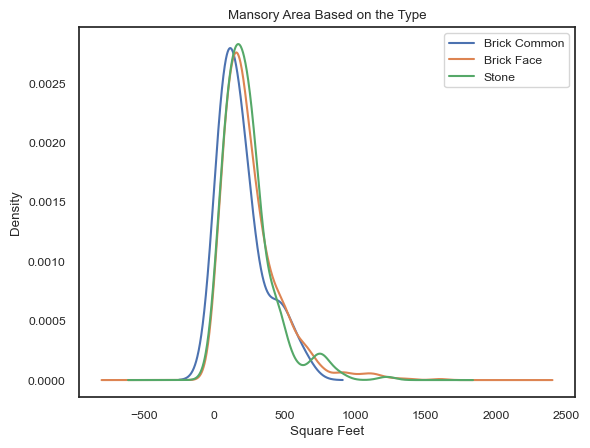

In [47]:
# Density Plot of Masonry Area (Square Feet)
sns.set_style('white')
masvnr.groupby('MasVnrType')['MasVnrArea'].plot(kind = 'kde')
plt.title('Mansory Area Based on the Type')
plt.xlabel('Square Feet')
plt.legend(['Brick Common','Brick Face', 'Stone'])

There are other of brick type, that is Cinder Block. However, we don't know how large the area of the type. So, we fill the NaN data to NA or None.

In [49]:
# Fill in the MasVnrX Columns 
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [50]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [51]:
all_data[['LotFrontage', 'GarageYrBlt', 'YearBuilt']]

,LotFrontage,GarageYrBlt,YearBuilt
0,65.0,2003.0,2003
1,80.0,1976.0,1976
2,68.0,2001.0,2001
3,60.0,1998.0,1915
4,84.0,2000.0,2000
...,...,...,...
1454,21.0,NaN,1970
1455,21.0,1970.0,1970
1456,160.0,1960.0,1960
1457,62.0,NaN,1992


Text(0.5, 1.0, 'House Construction')

<Figure size 1000x900 with 0 Axes>

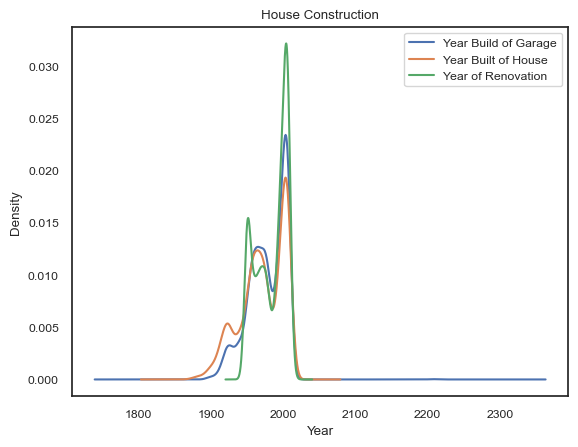

In [52]:
# Density Plot of the history of the house and garage
plt.figure(figsize = (10,9))
all_data[['GarageYrBlt','YearBuilt','YearRemodAdd']].plot(kind = 'kde')
plt.legend(['Year Build of Garage', 'Year Built of House', 'Year of Renovation'])
plt.xlabel('Year')
plt.title('House Construction')

In [53]:
# Age of the house before renovation
record_house = all_data[['YearBuilt','YearRemodAdd','GarageYrBlt','GarageType']]
record_house['OldHouse'] = record_house['YearRemodAdd']-record_house['YearBuilt']

Text(0.5, 1.0, 'Age of the House')

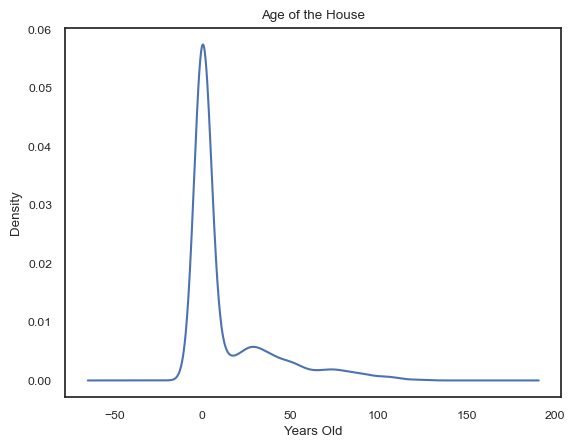

In [54]:
# Distribution of the House Age (The house before renovation)
record_house['OldHouse'].plot(kind = 'kde')
plt.xlabel('Years Old')
plt.title('Age of the House')

Most of the house are newly built.

Well, There are some reasons why the garage build first instead of the house:

1. Storage Needs

    A garage provides a space to save a lot kind of stuffs such as building materials, tools, food, and so on.
    
2. Temporary Living Space

    Some people turn the garage to the temporary living area while the house is in the process.
    
3. Financial Planning

    The homeowner decided to safe some money to the house construction
    
4. Zoning and Permits

    In some areas, it might be easier to get permits for a garage than a for house.
    
I had no strong references to support my statements. There are many reasons why the garage decided to build first outside these 4. So, I choose to ignore these kind of anomalies due to the lack of the information resources.

Text(0.5, 0, 'meters')

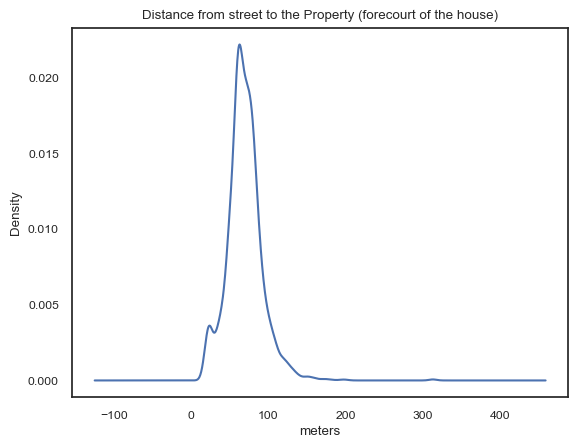

In [57]:
# Density Plot of Front area (before fill the null data)
all_data['LotFrontage'].plot(kind = 'kde')
plt.title('Distance from street to the Property (forecourt of the house)')
plt.xlabel('meters')

In [58]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

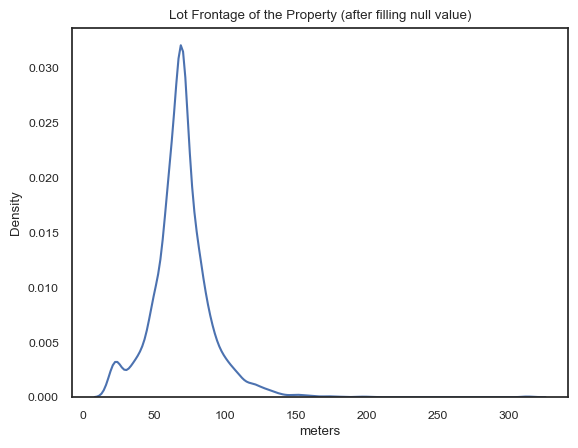

In [59]:
sns.kdeplot(all_data, x = all_data['LotFrontage'])
plt.title('Lot Frontage of the Property (after filling null value)')
plt.xlabel('meters')
plt.show()

In [60]:
# Fill GarageYrBlt null data with YearBuilt data
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

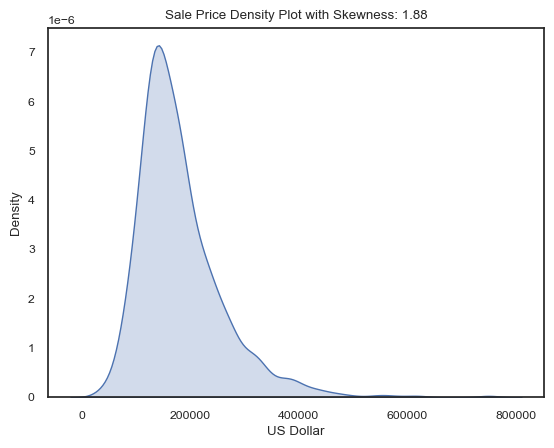

In [61]:
# Check Skewness of the SalePrice
from scipy.stats import skew
sns.kdeplot(data = train, x = train.SalePrice, fill=True)
plt.title(f'Sale Price Density Plot with Skewness: {round(skew(train.SalePrice),2)}')
plt.xlabel('US Dollar')
plt.show()

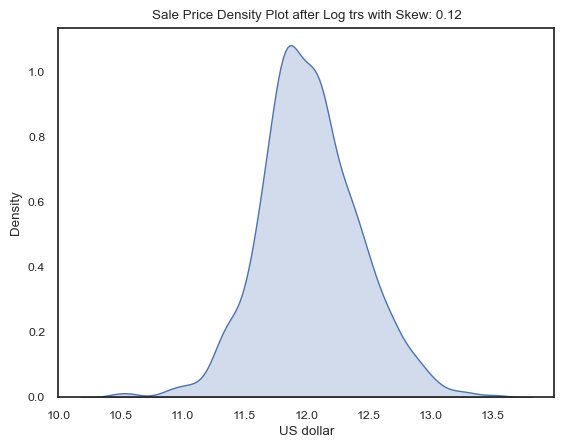

In [62]:
# Using Log transformation to Label of the data
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.kdeplot(data = train, x = train['SalePrice'], fill = True)
plt.title(f'Sale Price Density Plot after Log trs with Skew: {round(skew(train.SalePrice),2)}')
plt.xlabel('US dollar')
plt.show()

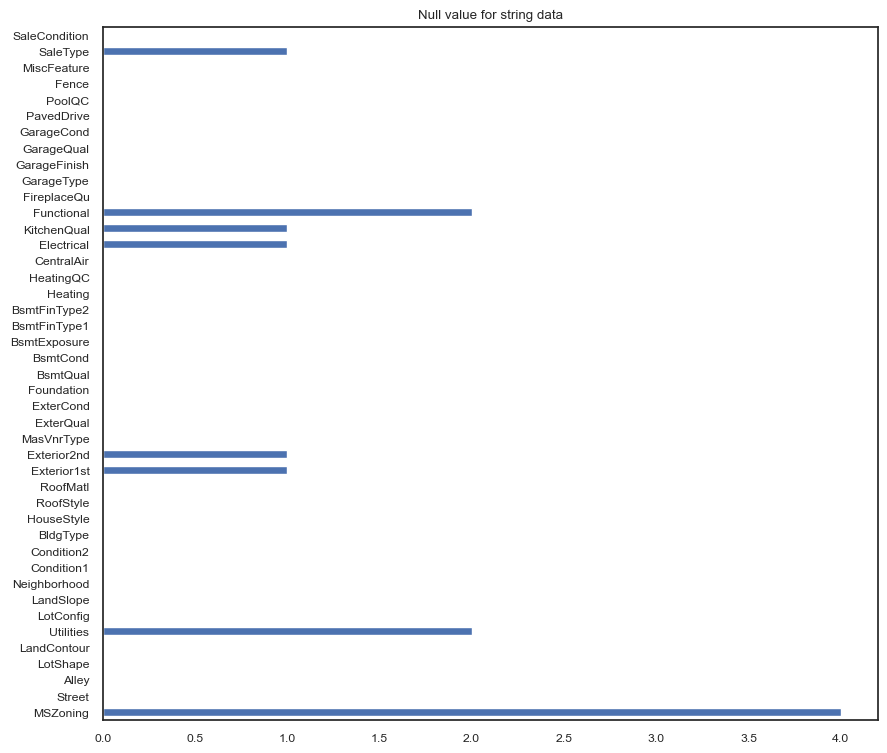

In [63]:
# Seperate string and numeric data
cat = all_data.select_dtypes(include='object')
num = all_data.select_dtypes(exclude = 'object')
plt.figure(figsize = (10,9))
all_data[cat.columns].isnull().sum().plot(kind = 'barh')
plt.title('Null value for string data')
plt.tight_layout
plt.show()

In [64]:
# Null Columns
cat_null = pd.DataFrame(all_data[cat.columns].isnull().sum(), columns = ['null_val'])
null_cols = cat_null[cat_null['null_val'] > 0].index

In [65]:
# Fill in the null string columns
for i in null_cols:
    modes = all_data[i].mode()[0]
    all_data[i].fillna(modes, inplace = True)

#### Data Description

---

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw  Contract Low Down payment and low interest
       ConLI  Contract Low Interest
       ConLD  Contract Low Down
       Oth	Other
       
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

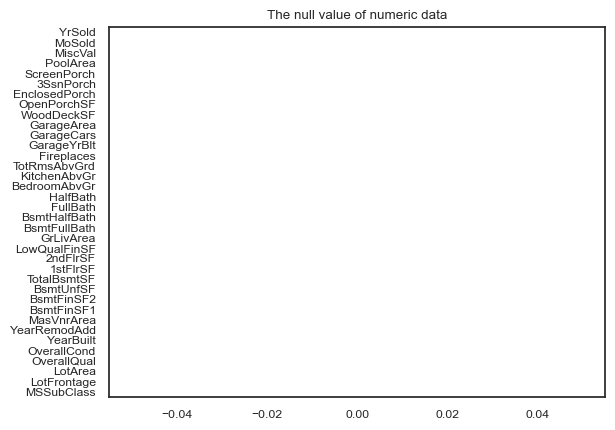

In [67]:
# check numeric data
all_data[num.columns].isnull().sum().plot(kind = 'barh')
plt.title('The null value of numeric data')
plt.show()

### Skewness

In [69]:
# Import package
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Seperate the data type

num = all_data.select_dtypes(exclude='object')
skewness = num.apply(lambda x: skew(x)).sort_values(ascending = False)
skew_data = pd.DataFrame(skewness, columns = ['skew_score'])

#Filter skewness (-0.5 < x < 0.5)
skew_filter = skew_data[(skew_data['skew_score'] > 0.5) | (skew_data['skew_score'] < -0.5)]
skew_filter

,skew_score
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


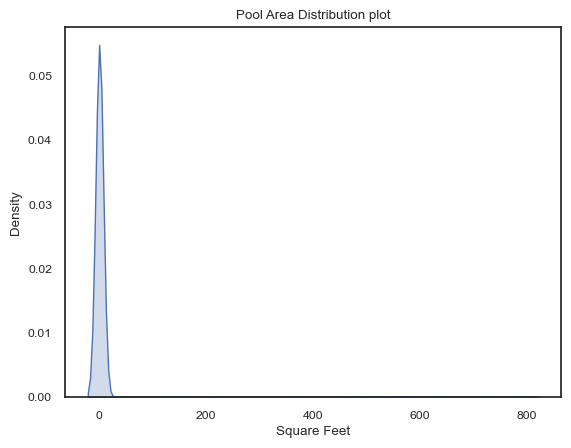

In [70]:
# Let's proof the skewness 
sns.kdeplot(all_data, x = all_data ['PoolArea'], fill = True)
plt.title('Pool Area Distribution plot')
plt.xlabel('Square Feet')
plt.show()

In [71]:
# log transformation skew data
for i in skew_filter.index:
    all_data[i] = np.log1p(all_data[i])

In [72]:
# check several numeric skewness
nums = all_data.select_dtypes(exclude='object')
new_skew = nums.apply(lambda x: skew(x)).sort_values(ascending = False)
new_num_data = pd.DataFrame(new_skew, columns = ['skew_scores'])
new_num_data

,skew_scores
PoolArea,14.998335
3SsnPorch,8.825256
LowQualFinSF,8.557690
MiscVal,5.213984
BsmtHalfBath,3.774762
...,...
YearBuilt,-0.626215
OverallCond,-0.746183
LotFrontage,-1.019461
BsmtUnfSF,-2.159073


In [73]:
# Include all Numeric datas
num = all_data.select_dtypes(exclude='object')
skewness = num.apply(lambda x: skew(x)).sort_values(ascending = False)
skew_data = pd.DataFrame(skewness, columns = ['skew_score'])

#Filter skewness (-0.5 < x < 0.5)
skew_filter = skew_data[(skew_data['skew_score'] > 0.5) | (skew_data['skew_score'] < -0.5)]
skew_filter

,skew_score
PoolArea,14.998335
3SsnPorch,8.825256
LowQualFinSF,8.557690
MiscVal,5.213984
BsmtHalfBath,3.774762
KitchenAbvGr,3.520351
ScreenPorch,2.945905
BsmtFinSF2,2.462483
EnclosedPorch,1.961081
HalfBath,0.580692


### Encoding & Training a Model

In [75]:
# sperate train and test data
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

In [76]:
# Lets encoding categorical data type
from sklearn.preprocessing import LabelEncoder

cat = X_train.select_dtypes(include = 'object').columns

for col in cat:
    le = LabelEncoder()
    le.fit(list(X_train[col].values))
    X_train[col] = le.transform(list(X_train[col].values))
    X_test[col] = le.transform(list(X_test[col].values))

In [79]:
# Import Platform for tracking model
import mlflow
# Import model package
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('/check-localhost-connection')

with mlflow.start_run():
    mlflow.log_metric('foo',1)
    mlflow.log_metric('bar',2)

2024/07/11 10:37:02 INFO mlflow.tracking.fluent: Experiment with name '/check-localhost-connection' does not exist. Creating a new experiment.


In [86]:
# Create another model by using KFold as a hyperparamter and RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from numbers import Number

# Set Up validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

def rmse_cv (model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv = kf, scoring = 'neg_mean_squared_error'))
    return rmse

def rmse_test(y, y_pred):
    rmse_ = np.sqrt(mean_squared_error(y, y_pred))
    return rmse_

In [88]:
# Create a function of root mean square error
def rmse_cv (model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
    return rmse

def rmse_test(y, y_pred):
    rmse_ = np.sqrt(mean_squared_error(y, y_pred))
    return rmse_

In [90]:
# create a prediction and record in to the MLFLOW 
mlflow.set_experiment('houseprice_prediction')
alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]
ridge_cv = [rmse_cv(RidgeCV(alphas = a )).mean() for a in alphas]
res_series = pd.Series(ridge_cv, index = alphas)
res_series

1.000000e-15    1.467240e+07
1.000000e-10    1.458906e+02
1.000000e-08    1.530400e+00
9.000000e-04    1.356486e-01
7.000000e-04    1.356492e-01
5.000000e-04    1.356501e-01
3.000000e-04    1.356520e-01
1.000000e-04    1.356587e-01
1.000000e-03    1.356484e-01
5.000000e-02    1.360468e-01
1.000000e-02    1.356981e-01
1.000000e-01    1.362502e-01
3.000000e-01    1.364042e-01
1.000000e+00    1.362972e-01
3.000000e+00    1.362675e-01
5.000000e+00    1.364269e-01
dtype: float64

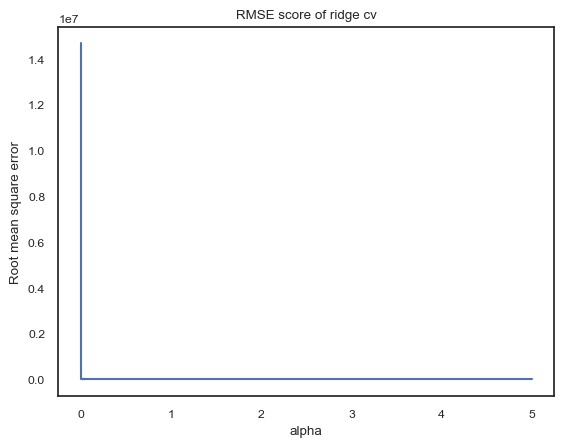

In [91]:
# Plot the result
res_series.plot(title = 'RMSE score of ridge cv')
plt.xlabel('alpha')
plt.ylabel('Root mean square error')
plt.show()

In [92]:
# Setup regression models

#Lightgmb regression
lightgbm = LGBMRegressor(objective = 'regression')

# XGBoost Regression
xgboost = XGBRegressor(learning_rate = 0.01)

# Ridge Regression
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = ridge_alphas, cv = kf))

# Support Vector Machine
svr = make_pipeline(RobustScaler(), SVR(C = 20, gamma = 0.0003))

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(learning_rate = 0.01, max_features='sqrt')

# Random Forest Regression
rf = RandomForestRegressor(max_depth =15)

# Stack all the model above
stack_models = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf), meta_regressor=xgboost, use_features_in_secondary=True)

In [93]:
rmse_scores = {}

score = rmse_cv(lightgbm)
print('LGBMRegression: {:.4f} ({:.4f})'.format(score.mean(), score.std()))
rmse_scores['lgb'] = (score.mean(), score.std())

# record by using mlflow
mlflow.set_experiment('exp_house_price_models')
lgmb_params = {'objective': 'regression'}
with mlflow.start_run():
    mlflow.log_params(lgmb_params)
    mlflow.log_metrics(metrics={'RMSE_mean':score.mean(), 'RMSE_std':score.std()})
    mlflow.sklearn.log_model(lightgbm, artifact_path = 'sklearn-model')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3110
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 72
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3123
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

2024/07/11 10:37:43 INFO mlflow.tracking.fluent: Experiment with name 'exp_house_price_models' does not exist. Creating a new experiment.


LGBMRegression: 0.1335 (0.0085)


In [94]:
# RMSE score of Support Vector Regression (SVR)
score = rmse_cv(svr)
print('SVR: {:.4f} ({:.4f})'.format(score.mean(), score.std()))
rmse_scores['SVR'] = (score.mean(), score.std())


svr_params = {"C":20, 'gamma':0.0003}
with mlflow.start_run():
    mlflow.log_params(svr_params)
    mlflow.log_metrics(metrics={'RMSE_mean':score.mean(), 'RMSE_std':score.std()})
    mlflow.sklearn.log_model(svr, artifact_path='sklearn-model')

SVR: 0.1323 (0.0188)


In [95]:
# Ridge Regression
score = rmse_cv(ridge)
print('Ridge: {:.4f} ({:.4f})'.format(score.mean(), score.std()))
rmse_scores['ridge'] = (score.mean(), score.std())

ridge_params = {'alphas': ridge_alphas, 'cv': kf}
with mlflow.start_run():
    mlflow.log_params(ridge_params)
    mlflow.log_metrics(metrics={'RMSE_mean':score.mean(), 'RMSE_std':score.std()})
    mlflow.sklearn.log_model(ridge, artifact_path = 'sklearn-model')

Ridge: 0.1348 (0.0165)


In [106]:
# XGBoost Regression
score = rmse_cv(xgboost)
print("XgBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
rmse_scores['xgboost'] = (score.mean(), score.std())

xgboost_params = {'learning_rate': 0.01}
with mlflow.start_run():
    mlflow.log_params(xgboost_params)
    mlflow.log_metrics(metrics = {'RMSE_mean':score.mean(), "RMSE_std":score.std()})

XgBoost: 0.2153 (0.0111)


In [114]:
# Random Forest Regression
score = rmse_cv(rf)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(),score.std()))
rmse_scores['random_forest'] = (score.mean(), score.std())

rf_params = {'max_depth': 15}
with mlflow.start_run():
    mlflow.log_params(rf_params)
    mlflow.log_metrics(metrics = {'RMSE_mean':score.mean(), 'RMSE_std':score.std()})

Random Forest: 0.1422 (0.0100)


2024/07/11 11:36:07 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: Failed to initialize NVML, skip logging GPU metrics: NVML Shared Library Not Found.
2024/07/11 11:36:07 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2024/07/11 11:36:07 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/07/11 11:36:07 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


In [124]:
score = rmse_cv(gbr)
print('Gradient Boosting Regressor: {:.4f} (std : {:.4f})'.format(score.mean(), score.std()))
rmse_scores['gradient_b_regressor'] = (score.mean(), score.std())

os.environ['MLFLOW_ENABLE_SYSTEM_METRICS_LOGGING'] = 'false'

gbr_params = {'learning_rate': 0.01, 'max_features': 'sqrt'}
with mlflow.start_run(run_name = 'grad_boost_reg_less_parameter'):
    mlflow.log_params(gbr_params)
    mlflow.log_metrics(metrics = {'RMSE_mean':score.mean(), 'RMSE_std': score.std()})

Gradient Boosting Regressor: 0.2453 (std : 0.0135)


## Fit the model

In [141]:
# Stack model
print('Accumulation model')
fit_stack_model = stack_models.fit(np.array(X_train), np.array(y_train))

Accumulation model
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 72
[LightGBM] [Info] Start training from score 12.021837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3119
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 72
[LightGBM] [Info] Start training from score 12.027793
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [153]:
# Light Gradient Boosting Regression
fit_lgbm = lightgbm.fit(X_train, y_train)

# XGboost
fit_xgbreg = xgboost.fit(X_train, y_train)

# Random Forest
fit_rf = rf.fit(X_train, y_train)

# Ridge Regression
fit_ridge = ridge.fit(X_train, y_train)

# Support Vector Regression (SVR)
fit_svr = svr.fit(X_train, y_train)

# Grad Boosting Regression
fit_gbr = gbr.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3392
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 12.024057


In [189]:
# Combine all machine learning model to create final predictions more robust to overfitting
def blended_prediction(X):
    return ((0.1 * fit_ridge.predict(X)) + (0.2 * fit_svr.predict(X)) + \
           (0.1 * fit_gbr.predict(X)) + (0.1 * fit_xgbreg.predict(X)) + \
           (0.1 * fit_lgbm.predict(X)) + (0.05 * fit_rf.predict(X)) + \
           (0.35 * fit_stack_model.predict(np.array(X))))

In [197]:
blend_score = rmse_test(y_train[:1459], blended_prediction(X_test))
rmse_scores['Blended'] = (blend_score, 0)
print('Machine learning combination model:')
print(blend_score)

with mlflow.start_run(run_name = 'Combination of Machine Learning Model'):
    mlflow.log_metrics(metrics = {'RMSE_mean':blend_score, 'RMSE_std':0})

Machine learning combination model:
0.4921324185295437


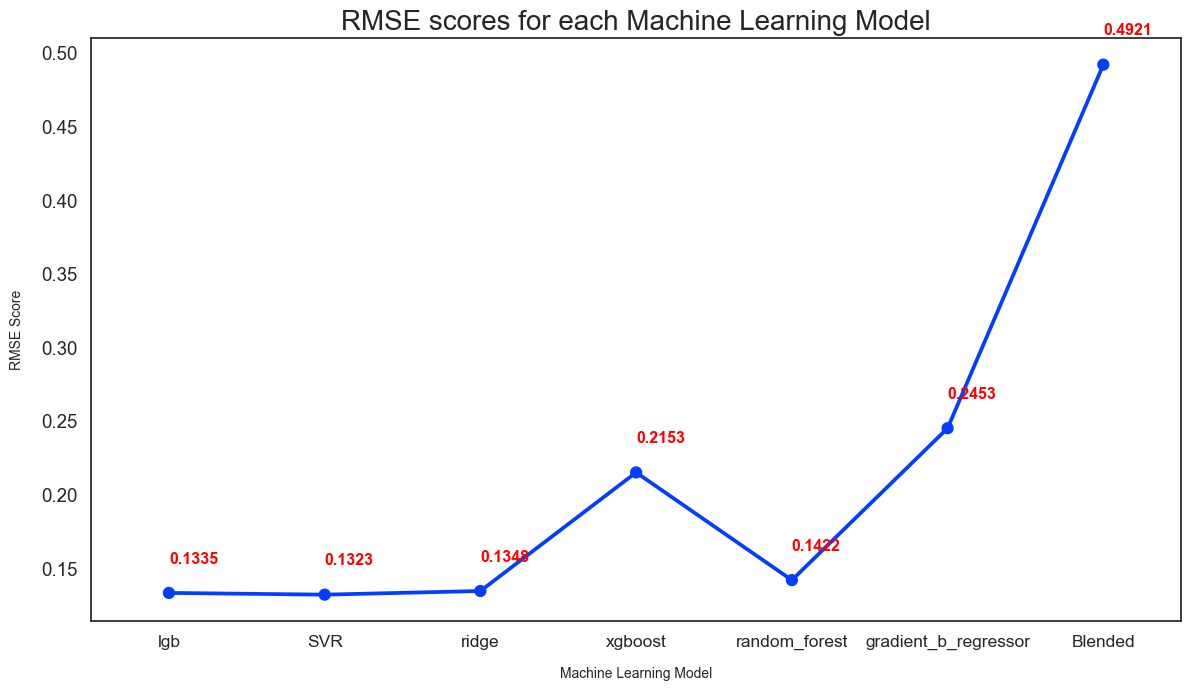

In [227]:
# Plot RMSE score of each machine learning model
plt.figure(figsize = (12,7))
ax = sns.pointplot(x = list(rmse_scores.keys()), y = [score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0] + 0.02, '{:.4f}'.format(score[0]), horizontalalignment= 'left', size = 'large', color = 'red', weight = 'semibold')

plt.xlabel('Machine Learning Model', size = 10, labelpad=12.5)
plt.ylabel('RMSE Score', size = 10, labelpad = 12.5)
plt.tick_params(axis = 'x', labelsize = 12.5)
plt.tick_params(axis = 'y', labelsize = 13.5)

plt.title('RMSE scores for each Machine Learning Model', size = 20)
plt.tight_layout()
plt.savefig('RMSE score', bbox_inches = 'tight')
plt.show()

In [203]:
# Using the model to 